In [35]:
'''
The link to the OG doc for LDA: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/discriminant_analysis.py
'''

feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()



,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [42]:
from sklearn.preprocessing import LabelEncoder

X = df[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']].values
y = df['class label'].values



enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}
print(X[0],len(y),y)
%matplotlib inline

[ 5.1  3.5  1.4  0.2] 150 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=3)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
print(np.shape(X_lda_sklearn))


(150, 2)


In [18]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()
    
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda_sklearn[:,0].real[y == label],
                y=X_lda_sklearn[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()



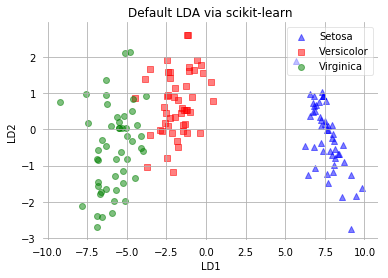

In [20]:

plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

In [6]:




import pandas as pd
from matplotlib import pyplot as plt

feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''
run='fg3_m_12'

#LDA_img_ratio_fg3_m12_early_late_all.txt
myr=5,200,180,185,190,195,205,210,220,225,230,240,250,260
df2 = pd.io.parsers.read_table(
    filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all.txt',#was '_view_all.txt'
    header=[0],
    sep='\t'
    )#,skiprows=10,nrows=10
#df=df.loc[df['Myr'] == 5 or df['Myr'] == 225]
#df=df.loc[df['Myr'].isin([5,200,myr])]
df2.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
df2.dropna(how="all", inplace=True) # to drop the empty line at file-end

list_kins=['NONSCATTER_MILESHC_corrected','SCATTER_MILESHC_corrected','SCATTER','NONSCATTER']

for i in range(len(list_kins)):
   
    add_on=list_kins[i]
    print('run', add_on)




    feature_dict = {i:label for i,label in zip(
                    range(9),
                      ('Counter',
                       'Myr',
                      'Viewpoint',
                      'Delta PA',
                      'v_asym',
                      's_asym',
                      'K_tot',
                      'resids',
                      'i'))}

    
    df = pd.io.parsers.read_table(
        filepath_or_buffer='PCA_kin_'+str(add_on)+'.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    #df=df.loc[df['Myr'] == 5 or df['Myr'] == 225]
    #df=df.loc[df['Myr'].isin([5,200,myr])]
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['fiber']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end



    merged = pd.merge(left=df2,right=df, on=['Myr','Viewpoint'])
    if i==4:
        print(merged)

    from sklearn.preprocessing import LabelEncoder


    X = merged[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry',
       'v_asym','s_asym']].values

    from sklearn import preprocessing



    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    n_params=9


    y = merged['class label'].values


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.8,0.2])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_
    
    
    
    print(dec)#mean accuracy on the given test data and labels.
    print(coef)
    print(inter)
    
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
    
    # QDA
    sklearn_qda = QDA(priors=[0.8,0.2])
    X_qda_sklearn = sklearn_qda.fit(X, y)
    dec_qda = sklearn_qda.score(X,y)
    
    #coef = sklearn_qda.coef_
    #inter = sklearn_qda.intercept_
    print(dec_qda)#mean accuracy on the given test data and labels.

    '''Make a histogram'''
    from scipy import stats
    import seaborn as sns
    plt.clf()
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(111)
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"])
    ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"])

    '''for label,col in zip(range(1,4),  ('blue', 'red')):
        input_hist=X_lda_sklearn
        input_all=X_lda_sklearn
        ax.hist(input_hist,
                       color=col,
                       label='class %s' %label_dict[label],
                       alpha=0.5,)#bins=bins,
        xt = plt.xticks()[0]  
        xmin, xmax = -0.1,0.7#min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(input_hist))

        # lets try the normal distribution first
        m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        #ax.plot(lnspc, pdf_g,  color=col) # plot it



    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])'''

    ax.set_xlabel('LD1', size=20)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Count', size=20)
    
    
    plt.legend(loc="upper right", fontsize=20)
    #fig.tight_layout() 
    #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
    #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
    plt.show()
    
#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')



EmptyDataError: No columns to parse from file

In [13]:
import math
NONSCATTER=[-0.69609521, -0.0078832,   4.41491687,  6.15332374, -3.04132293,  0.66753479,
   0.68833139, -0.35440716,  0.80938349]
#A,C,S,sigma,G,A_S,n,vel,M20
#1/10th
SCATTER=[ -7.46634884e-01,   2.65348228e-03 ,  4.05597665e+00 ,  6.91605057e+00,
   -3.65245610e+00 ,  6.83815770e-01 ,  7.85409412e-01,  -7.69581706e-01,
   -5.19556937e-02]
#A,C,S,A_S,vel,Gini,n,sigma,M20
#1/10th
SCATTER_MILESHC_corrected=[-0.81003349, -0.05767831 , 4.0528699  , 6.7326127,  -3.51244676,  0.93881014,
   0.72658846, -1.10888531,  0.27643255]
#A,C,S,vel,n,G,A_S,sigma,M20
#OOM
NONSCATTER_MILESHC_corrected=[-1.08988571,  0.02130446,  4.17536727,  6.55635034, -3.41241524,  1.34479293,
   0.55429217, -1.72265744 , 0.74637557]
#A,C,S,vel,n,Gini,sigma,A_S,M20
#OOM




list_names=[SCATTER,NONSCATTER,NONSCATTER_MILESHC_corrected,SCATTER_MILESHC_corrected]
act_names=['SCATTER','NONSCATTER','NONSCATTER_MILESHC_corrected','SCATTER_MILESHC_corrected']



        
for x in range(len(list_names)):
    for y in range(len(list_names)):
        try:
            exp=math.degrees(math.acos(np.dot(list_names[x],list_names[y])/(np.linalg.norm(list_names[x])*np.linalg.norm(list_names[y]))))
        except ValueError:
            print('Domain error', act_names[x], 'vs', act_names[y])
        if exp <90:
            expnow=exp
        else:
            expnow=abs(180-exp)
        print(act_names[x], 'vs', act_names[y], expnow)

SCATTER -0.746634884
NONSCATTER -0.69609521
NONSCATTER_MILESHC_corrected -1.08988571
SCATTER_MILESHC_corrected -0.81003349
SCATTER 0.00265348228
NONSCATTER -0.0078832
NONSCATTER_MILESHC_corrected 0.02130446
SCATTER_MILESHC_corrected -0.05767831
SCATTER 4.05597665
NONSCATTER 4.41491687
NONSCATTER_MILESHC_corrected 4.17536727
SCATTER_MILESHC_corrected 4.0528699
SCATTER 6.91605057
NONSCATTER 6.15332374
NONSCATTER_MILESHC_corrected 6.55635034
SCATTER_MILESHC_corrected 6.7326127
SCATTER -3.6524561
NONSCATTER -3.04132293
NONSCATTER_MILESHC_corrected -3.41241524
SCATTER_MILESHC_corrected -3.51244676
SCATTER 0.68381577
NONSCATTER 0.66753479
NONSCATTER_MILESHC_corrected 1.34479293
SCATTER_MILESHC_corrected 0.93881014
SCATTER 0.785409412
NONSCATTER 0.68833139
NONSCATTER_MILESHC_corrected 0.55429217
SCATTER_MILESHC_corrected 0.72658846
SCATTER -0.769581706
NONSCATTER -0.35440716
NONSCATTER_MILESHC_corrected -1.72265744
SCATTER_MILESHC_corrected -1.10888531
SCATTER -0.0519556937
NONSCATTER 0.80938

run fg3_m12
[1. 5. 0. 1. 0.]
[ 1. 10.  0.  1.  0.]
[ 1. 20.  0.  1.  0.]
[ 1. 30.  0.  1.  0.]
[1. 5. 1. 1. 0.]
[ 1. 10.  1.  1.  0.]
[ 1. 20.  1.  1.  0.]
[ 1. 30.  1.  1.  0.]
[1. 5. 2. 1. 0.]
[ 1. 10.  2.  1.  0.]
[ 1. 20.  2.  1.  0.]
[ 1. 30.  2.  1.  0.]
[1. 5. 3. 1. 0.]
[ 1. 10.  3.  1.  0.]
[ 1. 20.  3.  1.  0.]
[1. 5. 4. 1. 0.]
[ 1. 10.  4.  1.  0.]
[ 1. 20.  4.  1.  0.]
[ 1. 30.  4.  1.  0.]
[1. 5. 5. 1. 0.]
[ 1. 10.  5.  1.  0.]
[ 1. 20.  5.  1.  0.]
[ 1. 30.  5.  1.  0.]
[1. 5. 6. 1. 0.]
[ 1. 10.  6.  1.  0.]
[ 1. 20.  6.  1.  0.]
[0. 5. 0. 1. 0.]
[0. 5. 0. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 6. 1. 0.]
[0. 5. 6. 1. 0.]
X before norm [[ 0.70978658 -0.79113272  4.42303291 ...  0.34526739  2.9482
   0.35841947]
 [ 0.76440784 -0.84553525  4.3461586  ...  0.34911774  2.7168
   0.36333205]
 [ 0.71709391 -2.65401726  4.51544993 ...  0.

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:77: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 576x396 with 0 Axes>

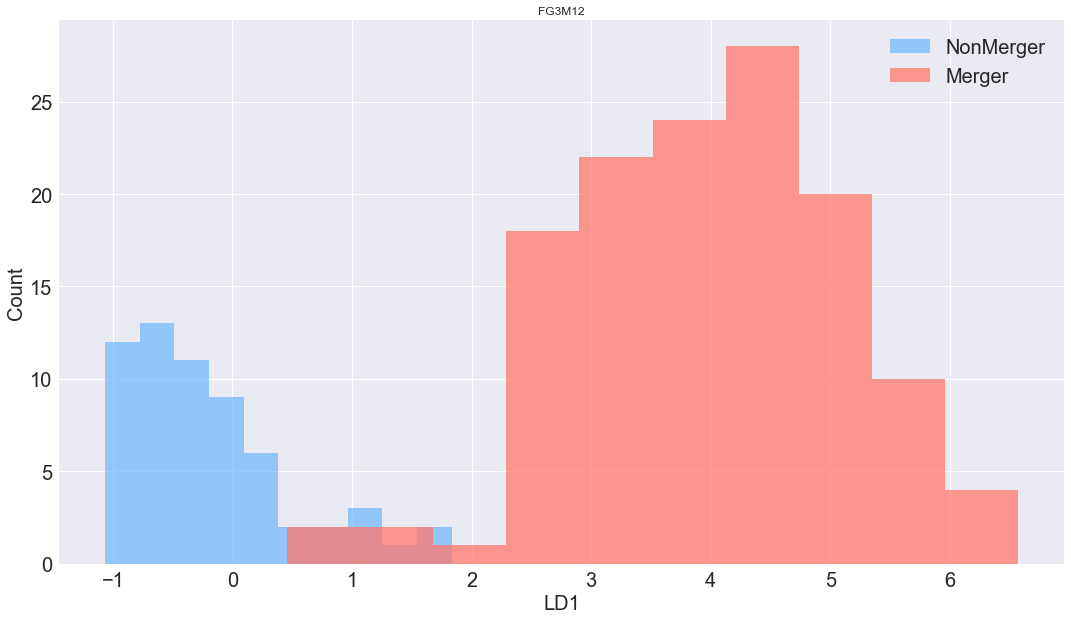

[[ 0.31715482 -2.57240147  4.45759542  6.70784565 -1.12017059  0.26683895
   0.69988222]]
     class label
0              1
1              1
2              1
3              1
4              1
5              1
6              1
7              1
8              1
9              1
10             1
11             1
12             0
13             0
14             0
15             0
16             1
17             1
18             1
19             1
20             1
21             1
22             1
23             1
24             1
25             1
26             1
27             1
28             1
29             1
..           ...
162            0
163            0
164            0
165            0
166            0
167            0
168            0
169            0
170            0
171            0
172            0
173            0
174            0
175            0
176            0
177            0
178            0
179            0
180            0
181            0
182            0
183      

/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[5, 10, 20, 30, 40, 60, 80, 100, 120, 140, 160, 170, 180, 185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260]
[nan, nan, nan, 14.720734014200001, 10.833442517049999, 1.4112349226542857, 0.0, 0.0, 0.0, 0.0, 0.0, 13.8434723605, 9.29042450805, 8.859599132252857, 4.076503523274286, 5.104557972292858, 10.038625556232857, 1.252560544277143, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
run fg1_m13
[ 1. 10.  0.  1.  0.]
[ 1. 10.  1.  1.  0.]
[ 1. 10.  2.  1.  0.]
[ 1. 10.  3.  1.  0.]
[ 1. 10.  4.  1.  0.]
[ 1. 10.  5.  1.  0.]
[ 1. 10.  6.  1.  0.]
[0. 5. 0. 1. 0.]
[0. 5. 0. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 6. 1. 0.]
[0. 5. 6. 1. 0.]
X before norm [[ 0.61020128 -1.84076285  2.72034022 ...  0.03551586  0.8552
   0.07418257]
 [ 0.61313577 -1.86532189  2.79654005 ...  0.12571824  0.8864
   0.16252166]
 [ 0.72319029 -1.57674979  2.82135715 ...  0.23993998  0.5

<Figure size 576x396 with 0 Axes>

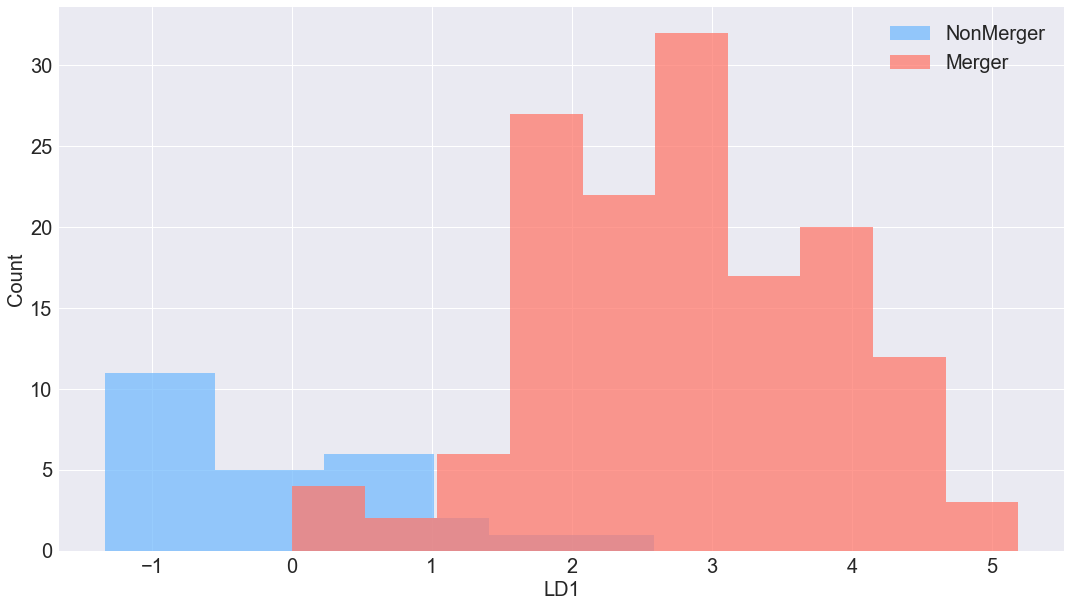

[[-1.02264439 -2.06155472  2.21632597  2.5695055   0.44245812  0.36149426
   1.24281559]]
     class label
0              0
1              1
2              1
3              1
4              1
5              1
6              1
7              1
8              1
9              1
10             1
11             1
12             1
13             1
14             1
15             1
16             1
17             1
18             1
19             1
20             1
21             1
22             0
23             1
24             1
25             1
26             1
27             1
28             1
29             1
..           ...
164            0
165            0
166            0
167            0
168            0
169            0
170            0
171            0
172            0
173            0
174            0
175            0
176            0
177            0
178            0
179            0
180            0
181            0
182            0
183            0
184            0
185      

In [38]:
'''
~~~
Now just for the imaging part of it!
~~~
'''



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12','fg1_m13']#,'fg1_m13']

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)


    run=list_runs[i]
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
            
            #I use this part to check if there is any separation at these points in time
            #Or if there are more than two bulges
            print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])
            
            #Then, you can optionally change the class values of all of these viewpoints
            
            #.set_value(index, col, value, 
            df.set_value(j,'class label',0.0)
    
    

    from sklearn.preprocessing import LabelEncoder


    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    print('X before norm', X)

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    print('X after norm', X)

    n_params=7


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.94,0.04])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_
    
    
   
    print('mean accuracy',dec)#mean accuracy on the given test data and labels.
    
    print(inter)
    
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
    
    # QDA
    sklearn_qda = QDA(priors=[0.94,0.04])
    X_qda_sklearn = sklearn_qda.fit(X, y)
    dec_qda = sklearn_qda.score(X,y)
    
    #coef = sklearn_qda.coef_
    #inter = sklearn_qda.intercept_
    print(dec_qda)#mean accuracy on the given test data and labels.

    '''Make a histogram'''
    from scipy import stats
    import seaborn as sns
    plt.clf()
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(111)
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"],alpha = 0.75)
    ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.75)

    '''for label,col in zip(range(1,4),  ('blue', 'red')):
        input_hist=X_lda_sklearn
        input_all=X_lda_sklearn
        ax.hist(input_hist,
                       color=col,
                       label='class %s' %label_dict[label],
                       alpha=0.5,)#bins=bins,
        xt = plt.xticks()[0]  
        xmin, xmax = -0.1,0.7#min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(input_hist))

        # lets try the normal distribution first
        m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        #ax.plot(lnspc, pdf_g,  color=col) # plot it



    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])'''

    ax.set_xlabel('LD1', size=20)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Count', size=20)
    
    
    plt.legend(loc="upper right", fontsize=20)
    #fig.tight_layout() 
    #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
    #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
    #frame1 = plt.gca()
    if run=='fg1_m_13':
        plt.title('FG1M13')
    if run=='fg3_m12':
        plt.title('FG3M12')
    plt.show()
    print(coef)
    #plt.savefig('../MaNGA_Papers/Paper_I/Marginalized_img_'+str(run)+'.pdf')
    #plt.clf()
    
    '''Also, making those mountain plots for the imaging runs'''
    
    
    
    '''Now measure LD1 for every row and then plot that'''
    import seaborn as sns
    

    n_params=7



    #coef is how you get the eigvecs (doesn't matter what slope offset is)
    #print('real eigvecs',(eigvec_sc.real))
    #print(len(X_lda[:,0].real[y==2]))#[y == label]
    xs=[]
    LDA1=[]
    if run=='fg3_m_12':
        myr=[170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,200]
    if run=='fg3_m12':
        myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,100,200]
    if run=='fg1_m13':
        myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,100,200]
    if run=='fg1_m_13':
        myr=[40,195,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,200]
    my_lists = {key:[] for key in myr}
    my_lists_non = []
    separations = {key:[] for key in myr}

    print(df[['class label']])
    #STOP
    
    for i in range(len(df)):
        if df[['class label']].values[i]==0 or df[['Myr']].values[i][0]==200:
            my_lists_non.append(X_lda_sklearn[i][0])
            continue
        my_lists[df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
        separations[df[['Myr']].values[i][0]].append(df[['Sep']].values[i][0])
        L=X_lda_sklearn[i][0]
        #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
        LDA1.append(L)
        xs.append(df[['Myr']].values[i][0])

    #print(mean(my_lists[180]))
    mean_non=np.mean(my_lists_non)+np.std(my_lists_non)
    means=[]
    std=[]
    separation_value=[]
    for i in range(len(myr)):
        means.append(np.mean(my_lists[myr[i]]))
        std.append(np.std(my_lists[myr[i]]))
        separation_value.append(np.mean(separations[myr[i]]))
    print(myr)
    print(separation_value)

    means=np.array(means)
    std=np.array(std)
    myr=np.array(myr)
    
    if run=='fg1_m13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        plt.clf()

        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)

    if run=='fg1_m_13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        plt.clf()

        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        ys_LD1=np.array([-1.7583e-01 for x in myr])
        #plt.plot(myr/100,ys_LD1)
        #plt.fill_between(myr/100, ys_LD1-0.588/2, ys_LD1+0.588/2,alpha=.5)
        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)
    if run=='fg3_m_12':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        plt.clf()

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.03,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.3,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.65,0.95), xycoords='axes fraction', size=9)
    if run=='fg3_m12':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        plt.clf()

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.63,0.97), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.7,0.97), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.85,1.01), xycoords='axes fraction', size=9)
    #plt.ylim([-1,1])
    plt.xlim([min(myr)/100,max(myr)/100])
    frame1 = plt.gca()
    #frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticks([])
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_imaging_priors_more_nonmerg_'+str(run)+'.pdf')



    '''Try to replot with a dimensionless y axis with just means and std'''
    
    
#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')



In [5]:
'''
A bootstrap method to determine errors by dropping each galaxy individuall
'''


'''
~~~
Now just for the imaging part of it!
~~~
'''



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
add_on='fg1_m13'#,'fg1_m13']#,'fg1_m13']

run=add_on
c_0=[]
c_1=[]
c_2=[]
c_3=[]
c_4=[]
c_5=[]
c_6=[]


for kz in range(len(df)):
    df = pd.io.parsers.read_table(
    filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
    header=[0],
    sep='\t'
    )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end

    df.drop(df.index[kz])
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]

        #Then, you can optionally change the class values of all of these viewpoints

        #.set_value(index, col, value, 
            df.set_value(j,'class label',0.0)



    from sklearn.preprocessing import LabelEncoder

    
    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    

    n_params=7


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.94,0.06])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    
    c_0.append(coef[0][0])
    c_1.append(coef[0][1])
    c_2.append(coef[0][2])
    c_3.append(coef[0][3])
    c_4.append(coef[0][4])
    c_5.append(coef[0][5])
    c_6.append(coef[0][6])
    
'''Now run the full out analysis please'''    
df = pd.io.parsers.read_table(
    filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
    header=[0],
    sep='\t'
    )#,skiprows=10,nrows=10
df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

for j in range(len(df)):
    if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]


        #I use this part to check if there is any separation at these points in time
        #Or if there are more than two bulges
        #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

        #Then, you can optionally change the class values of all of these viewpoints

        #.set_value(index, col, value, 
        df.set_value(j,'class label',0.0)



from sklearn.preprocessing import LabelEncoder


X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values

from sklearn import preprocessing



std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)


n_params=7


y = df['class label'].values


enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1


label_dict = {1: 'NonMerger', 2: 'Merger'}
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(priors=[0.94,0.06])
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
dec = sklearn_lda.score(X,y)
prob = sklearn_lda.predict_proba(X)

coef = sklearn_lda.coef_
print(coef)
print(np.mean(c_0),np.std(c_0))
print(np.mean(c_1),np.std(c_1))
print(np.mean(c_2),np.std(c_2))
print(np.mean(c_3),np.std(c_3))
print(np.mean(c_4),np.std(c_4))
print(np.mean(c_5),np.std(c_5))
print(np.mean(c_6),np.std(c_6))




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-06bfcc9bd58f>", line 64, in <module>
    sep='\t'
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", line 709, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", line 449, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", line 818, in __init__
    self._make_engine(self.engine)
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", line 1049, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", lin

FileNotFoundError: File b'LDA_img_ratio_fg1_m13_early_late_all_things.txt' does not exist

run fg3_m12
[1. 5. 0. 1. 0.]
[ 1. 10.  0.  1.  0.]
[ 1. 20.  0.  1.  0.]
[ 1. 30.  0.  1.  0.]
[1. 5. 1. 1. 0.]
[ 1. 10.  1.  1.  0.]
[ 1. 20.  1.  1.  0.]
[ 1. 30.  1.  1.  0.]
[1. 5. 2. 1. 0.]
[ 1. 10.  2.  1.  0.]
[ 1. 20.  2.  1.  0.]
[ 1. 30.  2.  1.  0.]
[1. 5. 3. 1. 0.]
[ 1. 10.  3.  1.  0.]
[ 1. 20.  3.  1.  0.]
[1. 5. 4. 1. 0.]
[ 1. 10.  4.  1.  0.]
[ 1. 20.  4.  1.  0.]
[ 1. 30.  4.  1.  0.]
[1. 5. 5. 1. 0.]
[ 1. 10.  5.  1.  0.]
[ 1. 20.  5.  1.  0.]
[ 1. 30.  5.  1.  0.]
[1. 5. 6. 1. 0.]
[ 1. 10.  6.  1.  0.]
[ 1. 20.  6.  1.  0.]
[0. 5. 0. 1. 0.]
[0. 5. 0. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 5. 1. 0.]


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:82: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


[0. 5. 5. 1. 0.]
[0. 5. 6. 1. 0.]
[0. 5. 6. 1. 0.]
X before norm [[ 0.70978658 -0.79113272  4.42303291 ...  0.34526739  2.9482
   0.35841947]
 [ 0.76440784 -0.84553525  4.3461586  ...  0.34911774  2.7168
   0.36333205]
 [ 0.71709391 -2.65401726  4.51544993 ...  0.27113807  2.7951
   0.60966631]
 ...
 [ 0.74797309 -1.43463724  2.72034022 ...  0.17243279  1.2946
   0.07219759]
 [ 0.76757161 -1.83924521  2.91788293 ...  0.08947134  0.8205
   0.12940721]
 [ 0.79288243 -2.11533177  3.11624645 ...  0.21211015  1.982
   0.09409341]]
X after norm [[-0.78457939  2.14009348  0.70981224 ...  0.82466546  1.80290494
   0.52860272]
 [ 0.15125372  2.03500344  0.6196955  ...  0.85103818  1.4863141
   0.55442342]
 [-0.65938194 -1.45846425  0.8181491  ...  0.31692122  1.59344056
   1.8491652 ]
 ...
 [-0.13032487  0.89702763 -1.28618767 ... -0.35915457 -0.45947458
  -0.97578976]
 [ 0.20545902  0.11544127 -1.05461609 ... -0.92739394 -1.10811641
  -0.67509397]
 [ 0.63911264 -0.41787864 -0.82208231 ... -0.0

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 576x396 with 0 Axes>

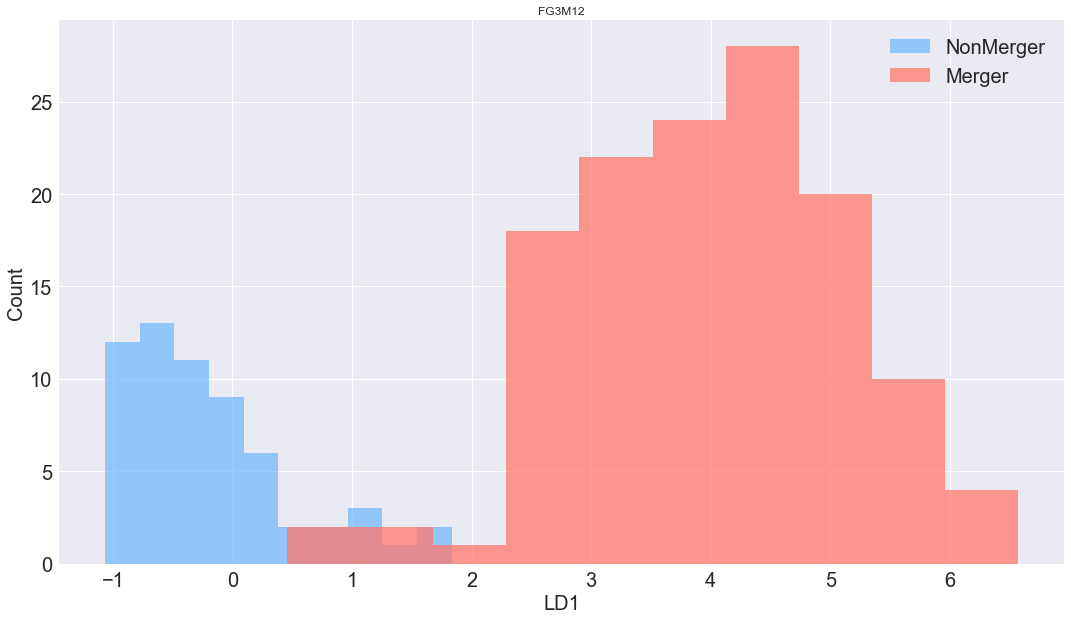

[[ 0.31715482 -2.57240147  4.45759542  6.70784565 -1.12017059  0.26683895
   0.69988222]]


/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


     class label
0              1
1              1
2              1
3              1
4              1
5              1
6              1
7              1
8              1
9              1
10             1
11             1
12             0
13             0
14             0
15             0
16             1
17             1
18             1
19             1
20             1
21             1
22             1
23             1
24             1
25             1
26             1
27             1
28             1
29             1
..           ...
162            0
163            0
164            0
165            0
166            0
167            0
168            0
169            0
170            0
171            0
172            0
173            0
174            0
175            0
176            0
177            0
178            0
179            0
180            0
181            0
182            0
183            0
184            0
185            0
186            0
187            0
188           

<Figure size 576x396 with 0 Axes>

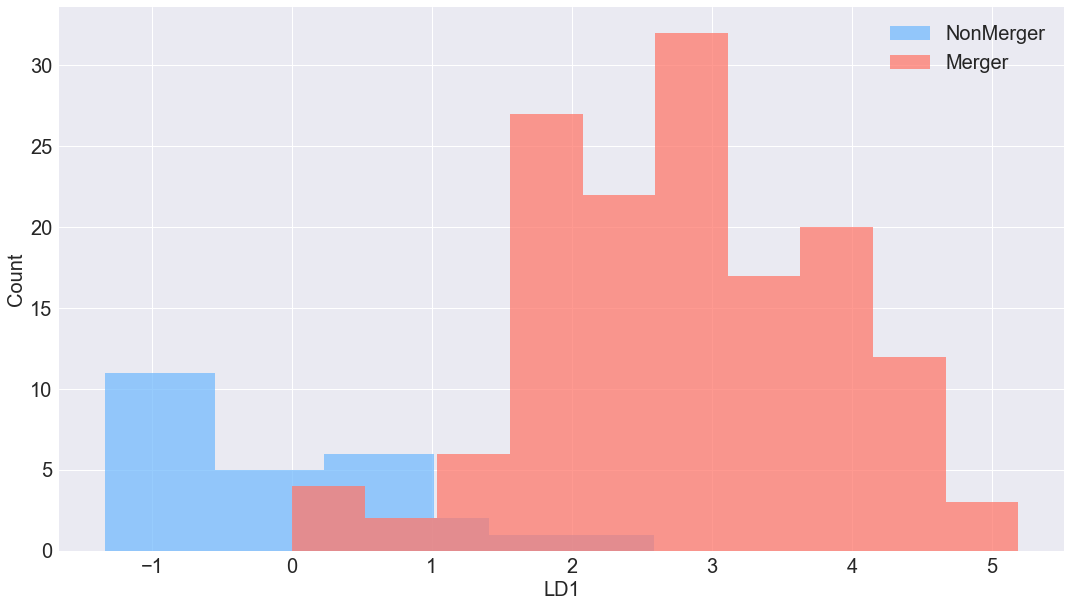

[[-1.02264439 -2.06155472  2.21632597  2.5695055   0.44245812  0.36149426
   1.24281559]]
     class label
0              0
1              1
2              1
3              1
4              1
5              1
6              1
7              1
8              1
9              1
10             1
11             1
12             1
13             1
14             1
15             1
16             1
17             1
18             1
19             1
20             1
21             1
22             0
23             1
24             1
25             1
26             1
27             1
28             1
29             1
..           ...
164            0
165            0
166            0
167            0
168            0
169            0
170            0
171            0
172            0
173            0
174            0
175            0
176            0
177            0
178            0
179            0
180            0
181            0
182            0
183            0
184            0
185      

In [73]:
'''
A tool for separating things in the classification out by viewing angle or other things like
myr snapshot :)
'''

'''
~~~
Now just for the imaging part of it!
~~~
'''
import numpy.ma as ma

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12','fg1_m13']#,'fg1_m13']

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)


    run=list_runs[i]
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
            
            #I use this part to check if there is any separation at these points in time
            #Or if there are more than two bulges
            print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])
            
            #Then, you can optionally change the class values of all of these viewpoints
            
            #.set_value(index, col, value, 
            df.set_value(j,'class label',0.0)
    
    

    from sklearn.preprocessing import LabelEncoder


    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    print('X before norm', X)

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    print('X after norm', X)

    n_params=7


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.94,0.04])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_
    
    
   
    print('mean accuracy',dec)#mean accuracy on the given test data and labels.
    
    print(inter)
    
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
    
    # QDA
    sklearn_qda = QDA(priors=[0.94,0.04])
    X_qda_sklearn = sklearn_qda.fit(X, y)
    dec_qda = sklearn_qda.score(X,y)
    
    #coef = sklearn_qda.coef_
    #inter = sklearn_qda.intercept_
    print(dec_qda)#mean accuracy on the given test data and labels.

    '''Make a histogram'''
    from scipy import stats
    import seaborn as sns
    plt.clf()
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(111)
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"],alpha = 0.75)
    ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.75)

    '''for label,col in zip(range(1,4),  ('blue', 'red')):
        input_hist=X_lda_sklearn
        input_all=X_lda_sklearn
        ax.hist(input_hist,
                       color=col,
                       label='class %s' %label_dict[label],
                       alpha=0.5,)#bins=bins,
        xt = plt.xticks()[0]  
        xmin, xmax = -0.1,0.7#min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(input_hist))

        # lets try the normal distribution first
        m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        #ax.plot(lnspc, pdf_g,  color=col) # plot it



    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])'''

    ax.set_xlabel('LD1', size=20)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Count', size=20)
    
    
    plt.legend(loc="upper right", fontsize=20)
    #fig.tight_layout() 
    #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
    #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
    #frame1 = plt.gca()
    if run=='fg1_m_13':
        plt.title('FG1M13')
    if run=='fg3_m12':
        plt.title('FG3M12')
    plt.show()
    print(coef)
    #plt.savefig('../MaNGA_Papers/Paper_I/Marginalized_img_'+str(run)+'.pdf')
    #plt.clf()
    
    '''Also, making those mountain plots for the imaging runs'''
    
    
    
    '''Now measure LD1 for every row and then plot that'''
    import seaborn as sns
    

    n_params=7



    #coef is how you get the eigvecs (doesn't matter what slope offset is)
    #print('real eigvecs',(eigvec_sc.real))
    #print(len(X_lda[:,0].real[y==2]))#[y == label]
    xs=[]
    LDA1=[]
    if run=='fg3_m_12':
        myr=[170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,200]
    if run=='fg3_m12':
        myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,100,200]
        myr_non=[5,10,20,30,100,200]
    if run=='fg1_m13':
        myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,10,100,200]
    if run=='fg1_m_13':
        myr=[40,195,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,200]
    my_lists = {key:[] for key in myr}
    my_lists_none = {key:[] for key in myr_non}
    my_lists_non = []
    separations = {key:[] for key in myr}

    print(df[['class label']])
    #STOP
    
    for i in range(len(df)):
        if df[['class label']].values[i]==0:
            my_lists_non.append(X_lda_sklearn[i][0])
            my_lists_none[df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
            continue
        my_lists[df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
        separations[df[['Myr']].values[i][0]].append(df[['Sep']].values[i][0])
        L=X_lda_sklearn[i][0]
        #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
        LDA1.append(L)
        xs.append(df[['Myr']].values[i][0])

    #print(mean(my_lists[180]))
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    
    
    mean_non=np.mean(my_lists_non)+np.std(my_lists_non)
    means=[]
    std=[]
    separation_value=[]
    plt.clf()
    
    for i in range(len(myr)):
        means.append(np.mean(my_lists[myr[i]]))
        std.append(np.std(my_lists[myr[i]]))
        separation_value.append(np.mean(separations[myr[i]]))
    for i in range(len(myr_non)):
        myr_plot=np.linspace(myr_non[i]/100,myr_non[i]/100,len(my_lists_none[myr_non[i]]))
        #np.full((3, 5), 7) that last value is your fill
        plt.scatter(myr_plot,my_lists_none[myr_non[i]], color=tableau20[i])
    
    
    means=np.array(means)
    std=np.array(std)
    myr=np.array(myr)
    
    if run=='fg1_m13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])
        #new_means=ma.masked_where(math.isnan(new_means),new_means)
        #print('these are apparently the myrs', myr/100)
        #print('these are the fills', new_means)
        
        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)

    if run=='fg1_m_13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        ys_LD1=np.array([-1.7583e-01 for x in myr])
        #plt.plot(myr/100,ys_LD1)
        #plt.fill_between(myr/100, ys_LD1-0.588/2, ys_LD1+0.588/2,alpha=.5)
        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)
    if run=='fg3_m_12':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.03,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.3,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.65,0.95), xycoords='axes fraction', size=9)
    if run=='fg3_m12':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.63,0.97), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.7,0.97), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.85,1.01), xycoords='axes fraction', size=9)
    #plt.ylim([-1,1])
    #plt.xlim([min(myr)/100,max(myr)/100])
    #plt.xlim([0,])
    frame1 = plt.gca()
    #frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticks([])
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_imaging_priors_colors_'+str(run)+'.pdf')



    '''Try to replot with a dimensionless y axis with just means and std'''
    
    
#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')



run fg3_m12


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:85: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


mean accuracy 0.921875
[-0.00813543]
0.9947916666666666


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 576x396 with 0 Axes>

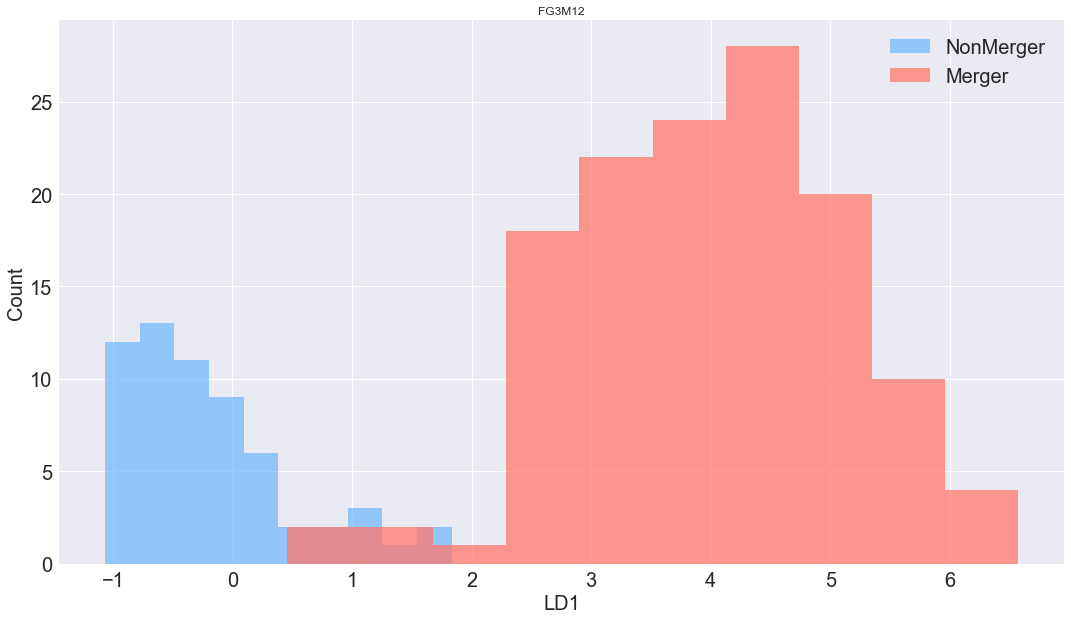

[[ 0.31715482 -2.57240147  4.45759542  6.70784565 -1.12017059  0.26683895
   0.69988222]]
viewpoint 0 color (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
xs [0.05, 0.1, 0.2, 0.3, 0.05, 1.0, 2.0, 0.05, 2.0]
ys [-0.6481010730925382, -1.0643241871206572, -0.5863586450362762, -0.6521083412172325, 0.38044828282875626, 0.5047279160837945, 1.117322326702996, -0.2213259702071559, 1.8344810470398782]
viewpoint 1 color (0.6823529411764706, 0.7803921568627451, 0.9098039215686274)
xs [0.05, 0.1, 0.2, 0.3, 0.05, 1.0, 2.0, 0.05, 2.0]
ys [-0.03457211035416759, 0.12556924400821756, -0.13075062836457937, -0.2535912072596354, -0.8505047873874365, -0.8062751652555147, 0.35215677762855535, -0.29266708795780066, 0.3558101726982156]
viewpoint 2 color (1.0, 0.4980392156862745, 0.054901960784313725)
xs [0.05, 0.1, 0.2, 0.3, 0.05, 1.0, 2.0, 0.05, 2.0]
ys [-0.040107983895598436, -0.19089507438962897, -0.40466870805490346, -0.2747736976896335, -0.7573927724792424, -0.940969013676215, 0.2414742483

/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


run fg1_m13
mean accuracy 0.7010309278350515
[-1.04187521]
0.9432989690721649


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:85: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


<Figure size 576x396 with 0 Axes>

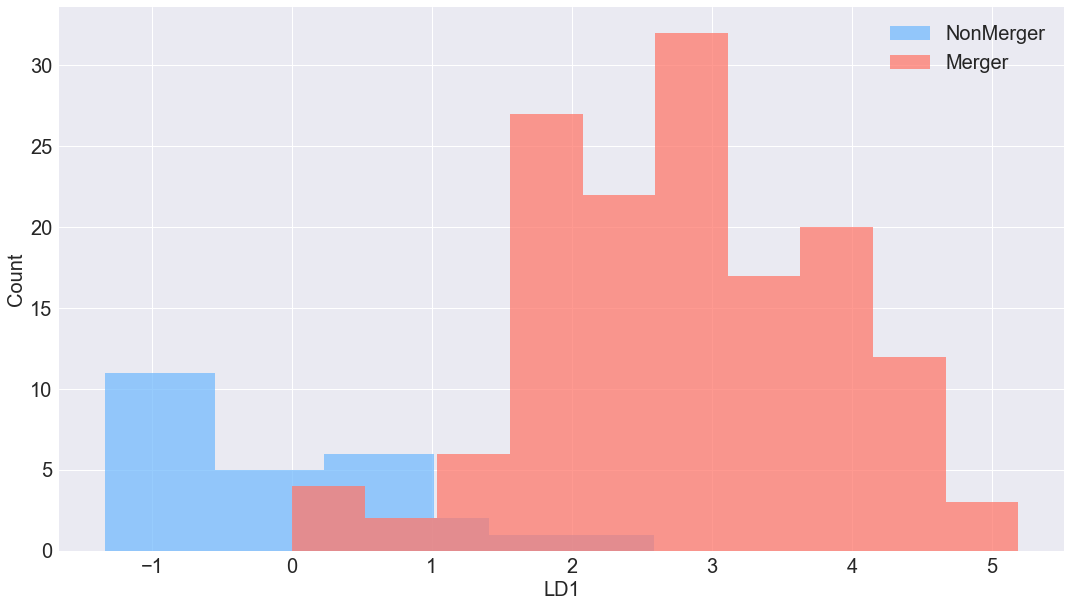

[[-1.02264439 -2.06155472  2.21632597  2.5695055   0.44245812  0.36149426
   1.24281559]]
viewpoint 0 color (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
xs [0.1, 0.05, 1.0, 2.0, 0.05, 1.0, 2.0]
ys [-0.4119705311946946, -0.9737271896550926, 1.2937212482803089, 2.5831351799074302, -0.2876854713871865, 0.42279236446262736, 2.030448472335018]
viewpoint 1 color (0.6823529411764706, 0.7803921568627451, 0.9098039215686274)
xs [0.1, 0.05, 1.0, 2.0, 0.05, 1.0, 2.0]
ys [-0.40834835629833244, -0.8656191983668096, -0.06960376368572588, 0.975810991627727, 0.022821928787974247, -1.2169595968931857, 0.3386369795141578]
viewpoint 2 color (1.0, 0.4980392156862745, 0.054901960784313725)
xs [0.1, 0.05, 1.0, 2.0, 0.05, 1.0, 2.0]
ys [-0.7674355128745384, -0.9648020474960798, 0.1470548357353855, 0.02945355677827221, -1.306012955129557, -1.252541910414434, -0.8408207749447179]
viewpoint 3 color (1.0, 0.7333333333333333, 0.47058823529411764)
xs [0.1, 0.05, 1.0, 2.0, 0.05, 1.0, 2.0]
ys [-0.668

In [1]:
'''
Now trying to do the same thing for different viewing angles
'''
'''
A tool for separating things in the classification out by viewing angle or other things like
myr snapshot :)
'''

'''
~~~
Now just for the imaging part of it!
~~~
'''
import numpy.ma as ma

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12','fg1_m13']#,'fg1_m13']

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)


    run=list_runs[i]
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
            
            #I use this part to check if there is any separation at these points in time
            #Or if there are more than two bulges
            #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])
            
            #Then, you can optionally change the class values of all of these viewpoints
            
            #.set_value(index, col, value, 
            df.set_value(j,'class label',0.0)
    
    

    from sklearn.preprocessing import LabelEncoder


    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    
    n_params=7


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.94,0.04])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_
    
    
   
    print('mean accuracy',dec)#mean accuracy on the given test data and labels.
    
    print(inter)
    
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
    
    # QDA
    sklearn_qda = QDA(priors=[0.94,0.04])
    X_qda_sklearn = sklearn_qda.fit(X, y)
    dec_qda = sklearn_qda.score(X,y)
    
    #coef = sklearn_qda.coef_
    #inter = sklearn_qda.intercept_
    print(dec_qda)#mean accuracy on the given test data and labels.

    '''Make a histogram'''
    from scipy import stats
    import seaborn as sns
    plt.clf()
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(111)
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"],alpha = 0.75)
    ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.75)

    '''for label,col in zip(range(1,4),  ('blue', 'red')):
        input_hist=X_lda_sklearn
        input_all=X_lda_sklearn
        ax.hist(input_hist,
                       color=col,
                       label='class %s' %label_dict[label],
                       alpha=0.5,)#bins=bins,
        xt = plt.xticks()[0]  
        xmin, xmax = -0.1,0.7#min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(input_hist))

        # lets try the normal distribution first
        m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        #ax.plot(lnspc, pdf_g,  color=col) # plot it



    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])'''

    ax.set_xlabel('LD1', size=20)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Count', size=20)
    
    
    plt.legend(loc="upper right", fontsize=20)
    #fig.tight_layout() 
    #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
    #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
    #frame1 = plt.gca()
    if run=='fg1_m_13':
        plt.title('FG1M13')
    if run=='fg3_m12':
        plt.title('FG3M12')
    plt.show()
    print(coef)
    #plt.savefig('../MaNGA_Papers/Paper_I/Marginalized_img_'+str(run)+'.pdf')
    #plt.clf()
    
    '''Also, making those mountain plots for the imaging runs'''
    
    
    
    '''Now measure LD1 for every row and then plot that'''
    import seaborn as sns
    

    n_params=7



    #coef is how you get the eigvecs (doesn't matter what slope offset is)
    #print('real eigvecs',(eigvec_sc.real))
    #print(len(X_lda[:,0].real[y==2]))#[y == label]
    xs=[]
    LDA1=[]
    if run=='fg3_m_12':
        myr=[170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,200]
    if run=='fg3_m12':
        myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,100,200]
        myr_non=[5,10,20,30,100,200]
    if run=='fg1_m13':
        myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,10,100,200]
    if run=='fg1_m_13':
        myr=[40,195,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,200]
        
    myr_non=[0,1,2,3,4,5,6]
    my_lists = {key:[] for key in myr}
    my_lists_none = {key:[] for key in myr_non}
    myr_lists_none = {key:[] for key in myr_non}
    
    
    my_lists_non = []
    separations = {key:[] for key in myr}

    
    
    for i in range(len(df)):
        if df[['class label']].values[i]==0:
            my_lists_non.append(X_lda_sklearn[i][0])
            my_lists_none[df[['Viewpoint']].values[i][0]].append(X_lda_sklearn[i][0])
            myr_lists_none[df[['Viewpoint']].values[i][0]].append(df[['Myr']].values[i][0]/100)
            continue
        my_lists[df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
        separations[df[['Myr']].values[i][0]].append(df[['Sep']].values[i][0])
        L=X_lda_sklearn[i][0]
        #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
        LDA1.append(L)
        xs.append(df[['Myr']].values[i][0])
    
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    
    
    mean_non=np.mean(my_lists_non)+np.std(my_lists_non)
    means=[]
    std=[]
    separation_value=[]
    plt.clf()
    
    for i in range(len(myr)):
        means.append(np.mean(my_lists[myr[i]]))
        std.append(np.std(my_lists[myr[i]]))
        separation_value.append(np.mean(separations[myr[i]]))
    for i in range(len(myr_non)):
        print('viewpoint', i, 'color', tableau20[i])
        print('xs',myr_lists_none[i])
        print('ys',my_lists_none[i])
        plt.scatter(myr_lists_none[i],my_lists_none[i], color=tableau20[i], label='Viewpoint '+str(i))
    
    
    means=np.array(means)
    std=np.array(std)
    myr=np.array(myr)
    
    if run=='fg1_m13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])
        #new_means=ma.masked_where(math.isnan(new_means),new_means)
        #print('these are apparently the myrs', myr/100)
        #print('these are the fills', new_means)
        
        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)

    if run=='fg1_m_13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        ys_LD1=np.array([-1.7583e-01 for x in myr])
        #plt.plot(myr/100,ys_LD1)
        #plt.fill_between(myr/100, ys_LD1-0.588/2, ys_LD1+0.588/2,alpha=.5)
        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)
    if run=='fg3_m_12':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.03,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.3,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.65,0.95), xycoords='axes fraction', size=9)
    if run=='fg3_m12':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.63,0.97), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.7,0.97), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.85,1.01), xycoords='axes fraction', size=9)
    #plt.ylim([-1,1])
    #plt.xlim([min(myr)/100,max(myr)/100])
    #plt.xlim([0,])
    frame1 = plt.gca()
    #frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticks([])
    plt.legend()
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_imaging_priors_view_colors_'+str(run)+'.pdf')



    '''Try to replot with a dimensionless y axis with just means and std'''
    
    
#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')




In [3]:
import math
import numpy as np
fg3_m12_eig=[-0.44704116, -0.19846481,  3.97432358 , 6.756875 ,  -3.43600737,  0.60019524,
   0.70102274]
fg1_m13_eig=[-4.11982369, -4.4733876 ,  2.68369004 , 4.80819964 , 2.01579354, -1.61902983,
  -0.17163867]

#Below includes the crazy early stage snaps
fg1_m13_eig=[-1.24785153, -1.36879871,  1.61823351,  1.19096409,  0.9506144,  -0.03610406, 1.00857967]
fg3_m12_eig=[-0.90623001, -0.51774611,  1.89655092,  1.09311821, 0.83090601, -0.61937621, 0.3815502 ]

fg3_m12_eig=[ 0.31715482, -2.57240147,  4.45759542,  6.70784565, -1.12017059,  0.26683895,   0.69988222]
fg1_m13_eig=[-1.02264439, -2.06155472,  2.21632597,  2.5695055,   0.44245812,  0.36149426,   1.24281559]

list_names=[fg3_m12_eig,fg1_m13_eig]
act_names=['FG3_M12','FG1_M13']
for x in range(len(list_names)):
    for y in range(len(list_names)):
        try:
            exp=math.degrees(math.acos(np.dot(list_names[x],list_names[y])/(np.linalg.norm(list_names[x])*np.linalg.norm(list_names[y]))))
        except ValueError:
            print('Domain error', act_names[x], 'vs', act_names[y])
        if exp <90:
            expnow=exp
        else:
            expnow=abs(180-exp)
        print(act_names[x], 'vs', act_names[y], expnow)


Domain error FG3_M12 vs FG3_M12
FG3_M12 vs FG3_M12 24.883209392779214
FG3_M12 vs FG1_M13 28.426712436284223
FG1_M13 vs FG3_M12 28.426712436284223
Domain error FG1_M13 vs FG1_M13
FG1_M13 vs FG1_M13 28.426712436284223


In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(priors=[0.8,0.2])
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
dec = sklearn_lda.score(X,y)
print(X_lda_sklearn)
coef = sklearn_lda.coef_
inter = sklearn_lda.intercept_
print(dec)
print(coef)
print(inter)

#plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

[[-1.24905461]
 [-1.68091976]
 [ 6.11884828]
 [ 5.47198309]
 [ 4.60309771]
 [ 4.87954727]
 [ 4.17413156]
 [ 2.41719754]
 [ 2.97902972]
 [ 3.25976892]
 [ 3.36865114]
 [ 3.5545208 ]
 [ 3.75685733]
 [ 3.84589582]
 [-1.54500051]
 [-1.42974055]
 [ 4.22642622]
 [ 3.33484153]
 [ 3.81751928]
 [ 3.06943415]
 [ 3.27857911]
 [ 2.3236804 ]
 [ 4.03394623]
 [ 4.21368238]
 [ 3.49088418]
 [ 3.57496975]
 [ 3.95586172]
 [ 3.37118699]
 [-1.58020943]
 [-0.89848461]
 [ 4.14912498]
 [ 4.82284989]
 [ 3.81352123]
 [ 3.91659071]
 [ 3.85951445]
 [ 2.34015896]
 [ 2.63493089]
 [ 3.07472385]
 [ 3.9168378 ]
 [ 3.29674971]
 [ 3.6968283 ]
 [ 2.42648068]
 [-1.70062429]
 [-1.08279531]
 [ 4.64566041]
 [ 2.53592523]
 [ 3.69385845]
 [ 4.23612936]
 [ 4.19900727]
 [ 2.78530766]
 [ 4.36577064]
 [ 4.67723876]
 [ 4.62902936]
 [ 2.9028692 ]
 [ 3.9237619 ]
 [ 2.82556094]
 [-0.6409273 ]
 [-0.12130954]
 [ 5.06461006]
 [ 4.92248169]
 [ 2.81614121]
 [ 5.44111939]
 [ 3.62730409]
 [ 4.05635161]
 [ 3.83527829]
 [ 4.03960082]
 [ 3.73802

In [49]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=0 * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()